# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

The purpose of the project is to examine user behavior on the two plans and determine which one brings in more revenue. I will prepare the data by looking for missing values and other problems before formatting it for analysis. I will examine user behavior with the available measures (calls, messages, and internet), compute the revenue generated by each user, and look for differences between the plans on that measure. Finally, I will conduct statistical tests addressing the main question: do the users of the two plans generate different amounts of revenue? 

## Initialization

In [1]:
# Load all the libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

## Load data

In [2]:
# Load the data files into different DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
# That doesn't make any sense for this DataFrame

df_plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
# Reviewer's code

display(df_calls.head(3))

df_calls.tail(3)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


,id,user_id,call_date,duration
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86


Everything looks good. There are two rows, one for each data plan. The data matches what was in the description. Nothing needs to be done.

## Fix data

Nothing needs to be done for now.

## Enrich data

Nothing needs to be done for now.

## Users

In [6]:
# Print the general/summary information about the users' DataFrame

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Print a sample of data for users

df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
65,1065,Sherlyn,Noel,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-03,surf,NaN
91,1091,Taylor,Oliver,38,"Riverside-San Bernardino-Ontario, CA MSA",2018-05-04,ultimate,NaN
281,1281,Zack,Hardy,39,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-07-23,surf,2018-11-14
61,1061,Maryam,Valencia,38,"Columbia, SC MSA",2018-03-08,ultimate,NaN
185,1185,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaN
419,1419,Bryon,Gordon,45,"Phoenix-Mesa-Chandler, AZ MSA",2018-03-29,surf,NaN
144,1144,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,ultimate,NaN
360,1360,Arturo,Mullins,75,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-09-20,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
138,1138,Arlie,Higgins,66,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-06,surf,NaN


The data looks good. I will convert the user_id column into the object type and reg_date and churn_rate columns into the date type. The churn_date column is missing a lot of data but I will ignore that until it becomes an issue. 

In [8]:
# Check for duplicate user_ids

print(f"Total user_ids: {len(df_users['user_id'])}")
print(f"Unique user_ids: {df_users['user_id'].nunique()}")
print(f"Duplicate user_ids: {df_users['user_id'].duplicated().sum()}")

Total user_ids: 500
Unique user_ids: 500
Duplicate user_ids: 0


### Fix Data

In [9]:
# Convert user_id to object data type and reg_date and chur_date to date data types

df_users['user_id'] = df_users['user_id'].astype(str)
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d') 
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d') 

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


### Enrich Data

Nothing needs to be done for now.

## Calls

In [10]:
# Print the general/summary information about the calls' DataFrame

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Print a sample of data for calls

df_calls.sample(20)

,id,user_id,call_date,duration
81234,1292_186,1292,2018-07-30,4.78
24955,1097_58,1097,2018-10-01,6.89
2669,1010_256,1010,2018-04-30,0.05
133498,1483_329,1483,2018-09-20,1.79
96815,1346_39,1346,2018-07-09,0.00
46928,1170_1064,1170,2018-10-25,6.16
31120,1117_94,1117,2018-06-30,0.81
61643,1222_290,1222,2018-12-21,4.76
37289,1141_190,1141,2018-11-02,9.02
119039,1415_87,1415,2018-10-06,8.78


In [12]:
# Check for duplicate ids

print(f"Total ids: {len(df_calls['id'])}")
print(f"Unique ids: {df_calls['id'].nunique()}")
print(f"Duplicate user_ids: {df_calls['id'].duplicated().sum()}")

Total ids: 137735
Unique ids: 137735
Duplicate user_ids: 0


In [13]:
# Check for zeros

(df_calls['duration'] == 0).sum()

26834

There are 26,834 calls with durations of 0 seconds, which is odd. I don't know why those were recorded or if they should be considered legitimate calls. Since I am not much interested in number of calls, though, I don't think it will be a problem. The zeros will have no effect when I sum durations across user_ids and months later, and that is the pertinent call data for these analyses.

Otherwise, the data looks good. I will convert the user_id column into the object type and call_date column into the date type.

### Fix data

In [14]:
# Convert user_id to object data type and call_date to date data type

df_calls['user_id'] = df_calls['user_id'].astype(str)
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enrich data

Nothing needs to be done for now. 

## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Print a sample of data for messages

df_messages.sample(20)

,id,user_id,message_date
33845,1213_45,1213,2018-12-07
68918,1446_128,1446,2018-10-12
56534,1357_165,1357,2018-08-22
61529,1384_677,1384,2018-06-10
40748,1261_410,1261,2018-07-09
75193,1489_268,1489,2018-12-29
22869,1137_211,1137,2018-12-18
4716,1044_78,1044,2018-12-31
14867,1100_189,1100,2018-12-28
18980,1123_49,1123,2018-11-09


In [17]:
# Check for duplicate ids

print(f"Total ids: {len(df_messages['id'])}")
print(f"Unique ids: {df_messages['id'].nunique()}")
print(f"Duplicate user_ids: {df_messages['id'].duplicated().sum()}")

Total ids: 76051
Unique ids: 76051
Duplicate user_ids: 0


The data looks good. I will convert the user_id column into the object type and message_date column into the date type.

### Fix data

In [18]:
# Convert user_id to object data type and message_date to date data type

df_messages['user_id'] = df_messages['user_id'].astype(str)
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enrich data

Nothing needs to be done for now.

## Internet

In [19]:
# Print the general/summary information about the internet DataFrame

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Print a sample of data for the internet traffic

df_internet.sample(20)

,id,user_id,session_date,mb_used
93052,1434_289,1434,2018-07-29,85.22
7531,1041_371,1041,2018-10-01,202.93
60801,1277_104,1277,2018-06-18,65.02
15630,1071_243,1071,2018-12-15,371.87
13810,1064_258,1064,2018-10-21,325.56
29355,1134_67,1134,2018-11-18,135.52
4255,1027_83,1027,2018-08-29,584.04
76377,1359_54,1359,2018-04-10,563.97
89407,1412_122,1412,2018-11-17,434.61
9111,1046_396,1046,2018-08-13,296.78


In [21]:
# Check for duplicate ids

print(f"Total ids: {len(df_internet['id'])}")
print(f"Unique ids: {df_internet['id'].nunique()}")
print(f"Duplicate user_ids: {df_internet['id'].duplicated().sum()}")

Total ids: 104825
Unique ids: 104825
Duplicate user_ids: 0


In [22]:
# Check for zeros

(df_internet['mb_used'] == 0).sum()

13747

There are 13,747 sessions that used 0 MB, which is odd. I don't know why those were recorded or if they should be considered legitimate sessions. As with calls, however, I am not much interested in the number of sessions. The zeros will have no effect when I sum usage across user_ids and months later, and that is the pertinent internet data for these analyses. 

Otherwise, the data looks good. I will convert the user_id column into the object type and session_date column into the date type.

### Fix data

In [23]:
# Convert user_id to object data type and session_date to date data type

df_internet['user_id'] = df_internet['user_id'].astype(str)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enrich data

Nothing needs to be done for now.

## Study plan conditions

In [24]:
# Print out the plan conditions and make sure they are clear for you

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

In [25]:
# Calculate the number of calls made by each user per month. Save the result.
# Apparently this means for each distinct month, not simply per month

df_calls['month'] = df_calls['call_date'].dt.month
calls_per_month = pd.DataFrame(df_calls.groupby(['user_id', 'month'])['id'].count())
calls_per_month.columns = ['calls']

calls_per_month

calls
user_id month       
1000    12        16
1001    8         27
        9         49
        10        65
        11        64
...              ...
1498    12        39
1499    9         41
        10        53
        11        45
        12        65

[2258 rows x 1 columns]

In [26]:
# Calculate the amount of minutes spent by each user per month. Save the result.
# Also round the duration data for later calculations

df_calls['rounded_duration'] = np.ceil(df_calls['duration']).astype(int)
minutes_per_month = pd.DataFrame(df_calls.groupby(['user_id', 'month'])['rounded_duration'].sum())
minutes_per_month.columns = ['minutes']

minutes_per_month

minutes
user_id month         
1000    12         124
1001    8          182
        9          315
        10         393
        11         426
...                ...
1498    12         339
1499    9          346
        10         385
        11         308
        12         496

[2258 rows x 1 columns]

In [27]:
# Reviewer's code

df_calls.groupby(['user_id'])['duration'].agg(['count', 'sum'])

,count,sum
user_id,,
1000,16,116.83
1001,261,1640.46
1002,113,777.13
1003,149,1041.00
1004,370,2618.95
...,...,...
1495,253,1666.41
1496,195,1376.21
1497,54,276.53


In [28]:
# Calculate the number of messages sent by each user per month. Save the result.

df_messages['month'] = df_messages['message_date'].dt.month
messages_per_month = pd.DataFrame(df_messages.groupby(['user_id', 'month'])['id'].count())
messages_per_month.columns = ['messages']

messages_per_month

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36
...                 ...
1496    9            21
        10           18
        11           13
        12           11
1497    12           50

[1806 rows x 1 columns]

In [29]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

df_internet['month'] = df_internet['session_date'].dt.month
mb_per_month = pd.DataFrame(df_internet.groupby(['user_id', 'month'])['mb_used'].sum())
mb_per_month.columns = ['mb']

mb_per_month

mb
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [30]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

df_monthly_merged = pd.concat([calls_per_month, minutes_per_month, messages_per_month, mb_per_month], axis=1)
df_monthly_merged.columns = ['calls', 'minutes', 'messages', 'mb']
df_monthly_merged.fillna(0, inplace=True)
df_monthly_merged['calls'] = df_monthly_merged['calls'].astype(int)
df_monthly_merged['minutes'] = df_monthly_merged['minutes'].astype(int)
df_monthly_merged['messages'] = df_monthly_merged['messages'].astype(int)

display(df_monthly_merged.info())
df_monthly_merged

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, ('1000', 12) to ('1499', 12)
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     2293 non-null   int64  
 1   minutes   2293 non-null   int64  
 2   messages  2293 non-null   int64  
 3   mb        2293 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 98.9+ KB


None

calls  minutes  messages        mb
user_id month                                    
1000    12        16      124        11   1901.47
1001    8         27      182        30   6919.15
        9         49      315        44  13314.82
        10        65      393        53  22330.49
        11        64      426        36  18504.30
...              ...      ...       ...       ...
1498    12        39      339         0  23137.69
1499    9         41      346         0  12984.76
        10        53      385         0  19492.43
        11        45      308         0  16813.83
        12        65      496         0  22059.21

[2293 rows x 4 columns]

In [31]:
# Add the plan information

df_monthly_merged = df_monthly_merged.reset_index()
df_monthly_merged = df_monthly_merged.merge(df_users[['user_id','plan']], on='user_id', how='left')

display(df_monthly_merged.info())
df_monthly_merged

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   object 
 1   month     2293 non-null   int64  
 2   calls     2293 non-null   int64  
 3   minutes   2293 non-null   int64  
 4   messages  2293 non-null   int64  
 5   mb        2293 non-null   float64
 6   plan      2293 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 143.3+ KB


None

,user_id,month,calls,minutes,messages,mb,plan
0,1000,12,16,124,11,1901.47,ultimate
1,1001,8,27,182,30,6919.15,surf
2,1001,9,49,315,44,13314.82,surf
3,1001,10,65,393,53,22330.49,surf
4,1001,11,64,426,36,18504.30,surf
...,...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69,surf
2289,1499,9,41,346,0,12984.76,surf
2290,1499,10,53,385,0,19492.43,surf
2291,1499,11,45,308,0,16813.83,surf


In [32]:
# Calculate the monthly revenue for each user
# Also round up GB used to match plan specifications

def calc_revenue(id, month):
    if df_monthly_merged.loc[df_monthly_merged['user_id'] == id, 'plan'].iloc[0] == 'surf': plan = 0
    else: plan = 1
        
    messages = df_monthly_merged.loc[(df_monthly_merged['user_id'] == id) & (df_monthly_merged['month'] == month), 'messages'].iloc[0]
    mb = df_monthly_merged.loc[(df_monthly_merged['user_id'] == id) & (df_monthly_merged['month'] == month), 'mb'].iloc[0]
    minutes = df_monthly_merged.loc[(df_monthly_merged['user_id'] == id) & (df_monthly_merged['month'] == month), 'minutes'].iloc[0]

    revenue = df_plans['usd_monthly_pay'][plan]
    revenue += max(0, messages - df_plans['messages_included'][plan]) * df_plans['usd_per_message'][plan]
    revenue += max(0, np.ceil((mb - df_plans['mb_per_month_included'][plan])/1024)) * df_plans['usd_per_gb'][plan]
    revenue += max(0, minutes - df_plans['minutes_included'][plan]) * df_plans['usd_per_minute'][plan]
    
    return(revenue)

def calc_revenue_wrapper(row):
     return calc_revenue(row['user_id'], row['month'])

df_monthly_merged['revenue'] = df_monthly_merged.apply(calc_revenue_wrapper, axis=1)

display(df_monthly_merged.info())
df_monthly_merged

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   object 
 1   month     2293 non-null   int64  
 2   calls     2293 non-null   int64  
 3   minutes   2293 non-null   int64  
 4   messages  2293 non-null   int64  
 5   mb        2293 non-null   float64
 6   plan      2293 non-null   object 
 7   revenue   2293 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 161.2+ KB


None

,user_id,month,calls,minutes,messages,mb,plan,revenue
0,1000,12,16,124,11,1901.47,ultimate,70.00
1,1001,8,27,182,30,6919.15,surf,20.00
2,1001,9,49,315,44,13314.82,surf,20.00
3,1001,10,65,393,53,22330.49,surf,90.09
4,1001,11,64,426,36,18504.30,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69,surf,100.00
2289,1499,9,41,346,0,12984.76,surf,20.00
2290,1499,10,53,385,0,19492.43,surf,70.00
2291,1499,11,45,308,0,16813.83,surf,40.00


## Study user behaviour

### Calls

In [33]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Create a dataframe with duration, plan, and date data then add a column for month

df_duration_by_month = df_calls.merge(df_users[['user_id','plan']], on='user_id', how='left')
df_duration_by_month['month'] = df_duration_by_month['call_date'].dt.month

df_duration_by_month

,id,user_id,call_date,duration,month,rounded_duration,plan
0,1000_93,1000,2018-12-27,8.52,12,9,ultimate
1,1000_145,1000,2018-12-27,13.66,12,14,ultimate
2,1000_247,1000,2018-12-27,14.48,12,15,ultimate
3,1000_309,1000,2018-12-28,5.76,12,6,ultimate
4,1000_380,1000,2018-12-30,4.22,12,5,ultimate
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,9,surf
137731,1499_200,1499,2018-10-20,10.89,10,11,surf
137732,1499_201,1499,2018-09-21,8.12,9,9,surf
137733,1499_202,1499,2018-10-10,0.37,10,1,surf


In [34]:
# Create a pivot table from the dataframe that with monthly duration data for each plan

df_avg_duration = df_duration_by_month.pivot_table(index='month', columns='plan', values='duration', aggfunc="mean")

df_avg_duration

plan,surf,ultimate
month,,
1,6.428000,6.541518
2,6.906175,6.517230
3,6.696919,6.210906
4,6.799918,6.659990
5,6.769200,6.662443
6,6.846812,6.705188
7,6.721710,6.879085
8,6.726164,6.613484
9,6.728684,6.770040


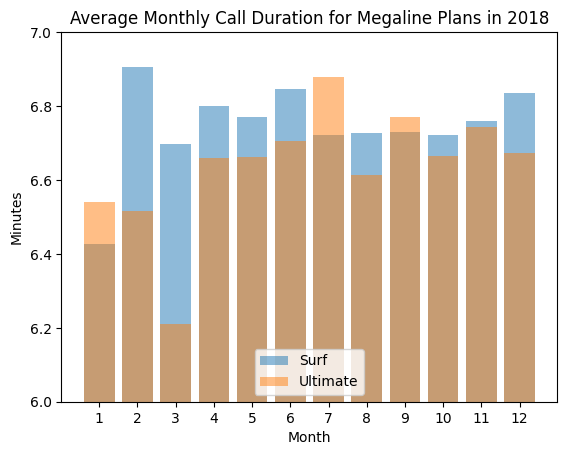

In [35]:
#Plot a bar plot for with the monthly duration data for each plan

plt.bar(range(1,13), df_avg_duration['surf'], label ='surf', alpha=.5)
plt.bar(range(1,13), df_avg_duration['ultimate'], label ='ultimate', alpha=.5) 
plt.ylim(6, 7)
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.title('Average Monthly Call Duration for Megaline Plans in 2018')
plt.legend(['Surf','Ultimate'], loc='lower center')
plt.show()

Call durations for the Surf plan were lowest in January, highest in February, and consistently a little lower for the rest of the year. Call durations for the Ultimate plan were moderate in January and February, very low in March, and consistently high for the rest of the year, peaking in July. 

Compared to Ultimate plan durations, Surf plan durations were much higher in February and March, a little lower in January, July, and September, and a little higher for the rest of the year. With the exceptions of February and March, when Surf plan durations were considerably higher than Ultimate plan durations, the plans were about equal for every other month with seemingly random variation that slightly favored Surf plan durations. 

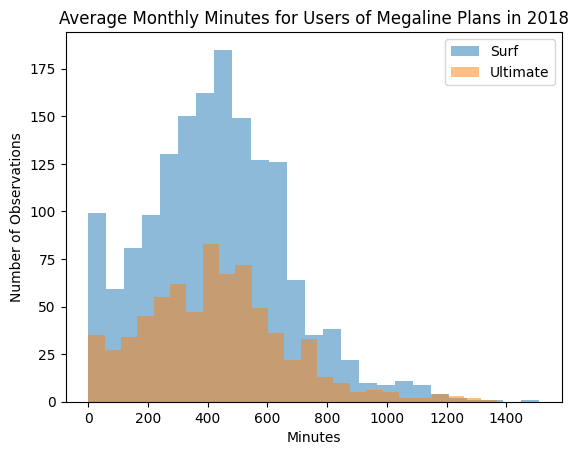

In [36]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

surf_minutes = df_monthly_merged[df_monthly_merged['plan'] == 'surf']['minutes']
ultimate_minutes = df_monthly_merged[df_monthly_merged['plan'] == 'ultimate']['minutes']

plt.hist(surf_minutes, bins=25, alpha=.5)
plt.hist(ultimate_minutes, bins=25, alpha=.5)
plt.xlabel('Minutes')
plt.ylabel('Number of Observations')
plt.title('Average Monthly Minutes for Users of Megaline Plans in 2018')
plt.legend(['Surf','Ultimate'])
plt.show()

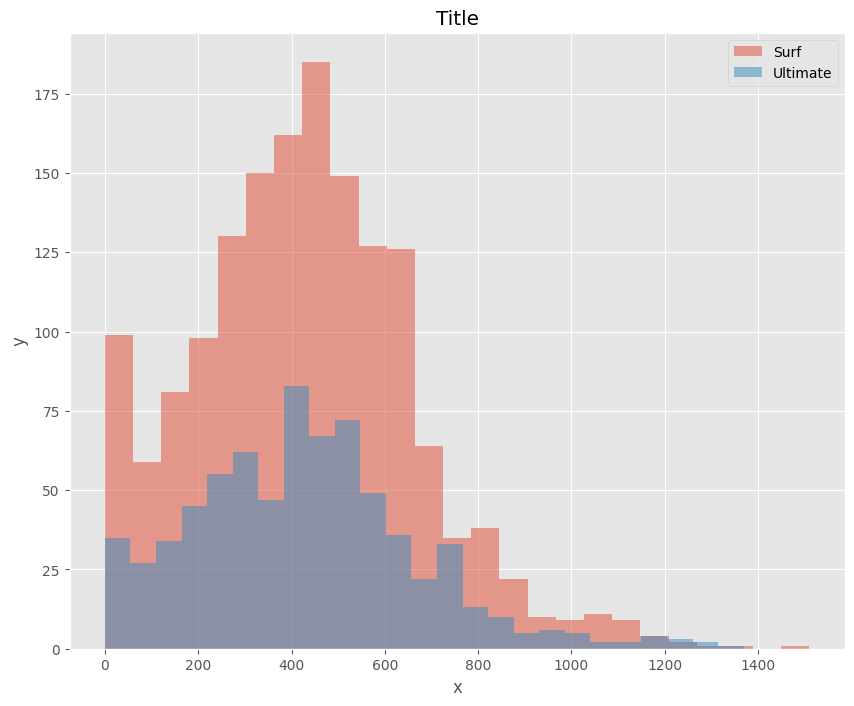

In [61]:
# Reviewer's code 2

plt.style.use('ggplot') # Add style. You can put it in the very first cell, after plt is defined.

df_monthly_merged.groupby('plan')['minutes'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Title')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [37]:
# Calculate the mean and variance of monthly call duration

print(f"Mean of monthly minutes used by Surf plan users: {np.mean(surf_minutes):.2f}")
print(f"Mean of monthly minutes used by Ultimate plan users: {np.mean(ultimate_minutes):.2f}")
print()
print(f"Standard deviation of monthly minutes used by Surf plan users: {np.std(surf_minutes):.2f}")
print(f"Standard deviation of monthly minutes used by Ultimate plan users: {np.std(ultimate_minutes):.2f}")
print()
print(f"Variance of monthly minutes used by Surf plan users: {np.var(surf_minutes):.2f}")
print(f"Variance of monthly minutes used by Ultimate plan users: {np.var(ultimate_minutes):.2f}")
print()
print(f"Number of Surf plan users: {len(surf_minutes)}")
print(f"Number of Ultimate plan users: {len(ultimate_minutes)}")

Mean of monthly minutes used by Surf plan users: 428.75
Mean of monthly minutes used by Ultimate plan users: 430.45

Standard deviation of monthly minutes used by Surf plan users: 234.38
Standard deviation of monthly minutes used by Ultimate plan users: 240.34

Variance of monthly minutes used by Surf plan users: 54933.33
Variance of monthly minutes used by Ultimate plan users: 57764.13

Number of Surf plan users: 1573
Number of Ultimate plan users: 720


In [62]:
# Reviewer's code 2

df_monthly_merged.pivot_table(index='plan', values=['minutes'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,minutes,minutes,minutes
plan,,,
surf,428.749523,234.453150,54968.279461
ultimate,430.450000,240.508762,57844.464812


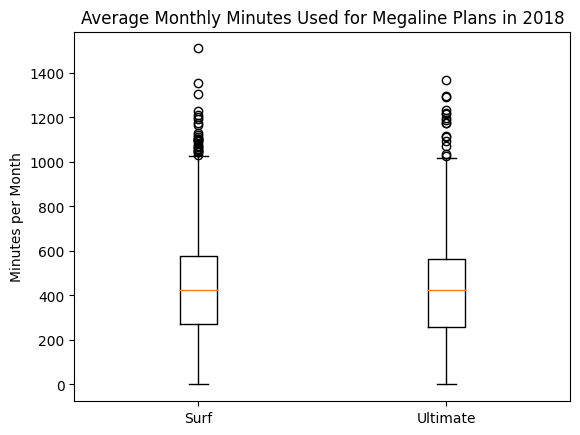

In [38]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.boxplot([surf_minutes, ultimate_minutes])
plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.ylabel('Minutes per Month')
plt.title('Average Monthly Minutes Used for Megaline Plans in 2018')
plt.show()

In [39]:
# Test the difference in monthly minutes between plans with a t-test

print("Independent t-test comparing average monthly minutes for Surf and Ultimate plans:")
print(f"t-statistic: {st.ttest_ind(surf_minutes, ultimate_minutes)[0]:.2f}")
print(f"p-value: {st.ttest_ind(surf_minutes, ultimate_minutes)[1]:.4f}")

Independent t-test comparing average monthly minutes for Surf and Ultimate plans:
t-statistic: -0.16
p-value: 0.8730


The distributions of monthly minutes used by Surf and Ultimate plans shared the same basic shape, which is moderately right-skewed. Frequencies were consistently higher for Surf plans than Ultimate plans across the distributions. Overall, Surf plans were more frequent and slightly less right-skewed than Ultimate plans.

The mean and variance of monthly minutes were very slightly lower for Surf plans (M = 428.75, Var = 54933.33) than for Ultimate plans (M = 430.45, Var = 57764.13) but the difference was quite small, and there were almost twice as many Surf user-months (N = 1573) as Ultimate users-months (N = 720). It looks to me like calling behavior is very similar across plans, as confirmed by a non-significant t-test (t = -0.16, p = .87).

### Messages

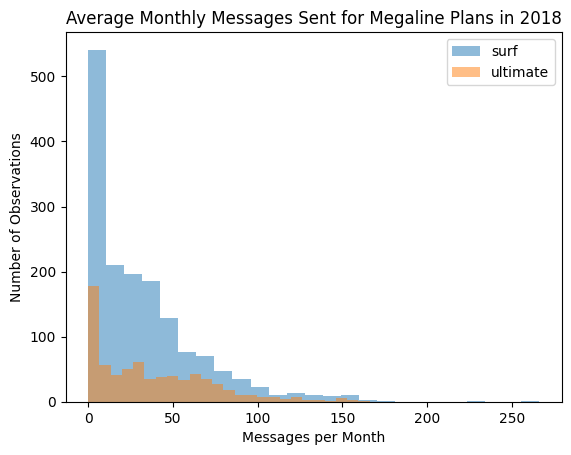

In [40]:
# Compare the number of messages users of each plan tend to send each month

surf_messages = df_monthly_merged[df_monthly_merged['plan'] == 'surf']['messages']
ultimate_messages = df_monthly_merged[df_monthly_merged['plan'] == 'ultimate']['messages']

plt.hist(surf_messages, bins=25, alpha=.5)
plt.hist(ultimate_messages, bins=25, alpha=.5)
plt.xlabel('Messages per Month')
plt.ylabel('Number of Observations')
plt.title('Average Monthly Messages Sent for Megaline Plans in 2018')
plt.legend(['surf','ultimate'])
plt.show()

In [41]:
# Calculate the mean and the variance of the monthly messages sent

print(f"Mean of monthly messages sent by Surf plan users: {np.mean(surf_messages):.2f}")
print(f"Mean of monthly messages sent by Ultimate plan users: {np.mean(ultimate_messages):.2f}")
print()
print(f"Standard deviation of monthly messages sent by Surf plan users: {np.std(surf_messages):.2f}")
print(f"Standard deviation of monthly messages sent by Ultimate plan users: {np.std(ultimate_messages):.2f}")
print()
print(f"Variance of monthly messages sent by Surf plan users: {np.var(surf_messages):.2f}")
print(f"Variance of monthly messages sent by Ultimate plan users: {np.var(ultimate_messages):.2f}")

Mean of monthly messages sent by Surf plan users: 31.16
Mean of monthly messages sent by Ultimate plan users: 37.55

Standard deviation of monthly messages sent by Surf plan users: 33.56
Standard deviation of monthly messages sent by Ultimate plan users: 34.74

Variance of monthly messages sent by Surf plan users: 1126.01
Variance of monthly messages sent by Ultimate plan users: 1207.08


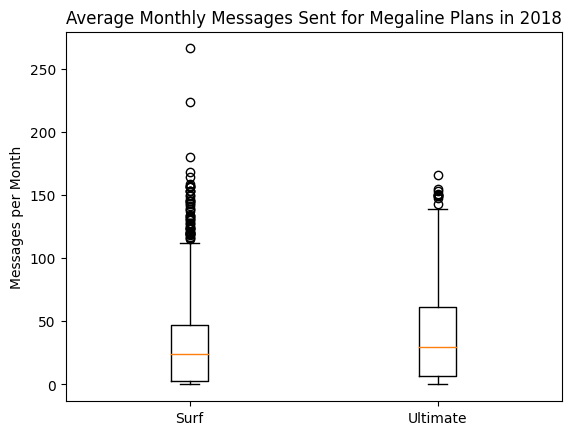

In [42]:
# Plot a boxplot to visualize the distribution of the monthly message sent

plt.boxplot([surf_messages, ultimate_messages])
plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.ylabel('Messages per Month')
plt.title('Average Monthly Messages Sent for Megaline Plans in 2018')
plt.show()

In [43]:
# Compare the amount of internet traffic consumed by users per plan
# This can't possibly belong here so I'm going to skip it until the next section

In [44]:
# Test the difference in monthly messages between plans with a t-test

print("Independent t-test comparing average monthly messages for Surf and Ultimate plans:")
print(f"t-statistic: {st.ttest_ind(surf_messages, ultimate_messages)[0]:.2f}")
print(f"p-value: {st.ttest_ind(surf_messages, ultimate_messages)[1]:.4f}")

Independent t-test comparing average monthly messages for Surf and Ultimate plans:
t-statistic: -4.18
p-value: 0.0000


The distributions of monthly messages used by Surf and Ultimate plans shared the same basic shape, which is extremely right-skewed. Frequencies were consistently higher for Surf plans than Ultimate plans across the distributions, especially for lower values. Overall, Surf plans were more frequent and considerably more right-skewed than Ultimate plans.

The mean and variance of monthly messages were somewhat lower for Surf plans (M = 31.16, Var = 1126.01) than for Ultimate plans (M = 37.55, Var = 1207.08). It looks like Surf plan users send fewer messages than Ultimate plan users, as confirmed by a significant t-test (t = -4.18, p < 0.05).

### Internet

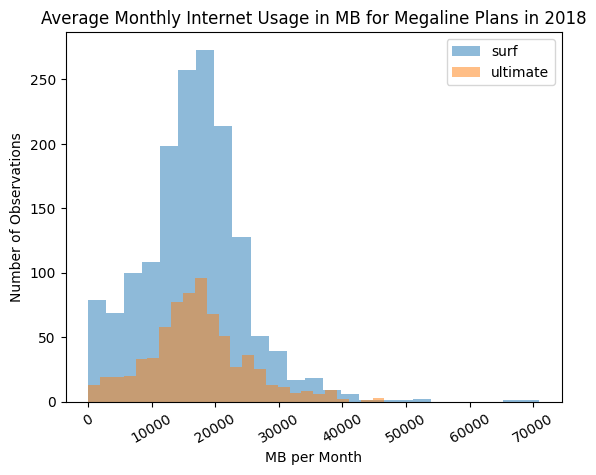

In [45]:
# Compare the number of MB users of each plan tend to use each month

surf_internet = df_monthly_merged[df_monthly_merged['plan'] == 'surf']['mb']
ultimate_internet = df_monthly_merged[df_monthly_merged['plan'] == 'ultimate']['mb']

plt.hist(surf_internet, bins=25, alpha=.5)
plt.hist(ultimate_internet, bins=25, alpha=.5)
plt.xlabel('MB per Month')
plt.ylabel('Number of Observations')
plt.xticks(rotation=30)
plt.title('Average Monthly Internet Usage in MB for Megaline Plans in 2018')
plt.legend(['surf','ultimate'])
plt.show()

In [46]:
# Calculate the mean and the variance of the monthly internet usage

print(f"Mean of monthly internet usage in MB by Surf plan users: {np.mean(surf_internet):.2f}")
print(f"Mean of monthly internet usage in MB by Ultimate plan users: {np.mean(ultimate_internet):.2f}")
print()
print(f"Standard deviation of monthly internet usage in MB by Surf plan users: {np.std(surf_internet):.2f}")
print(f"Standard deviation of monthly internet usage in MB by Ultimate plan users: {np.std(ultimate_internet):.2f}")
print()
print(f"Variance of monthly internet usage in MB by Surf plan users: {np.var(surf_internet):.2f}")
print(f"Variance of monthly internet usage in MB by Ultimate plan users: {np.var(ultimate_internet):.2f}")

Mean of monthly internet usage in MB by Surf plan users: 16558.28
Mean of monthly internet usage in MB by Ultimate plan users: 17214.70

Standard deviation of monthly internet usage in MB by Surf plan users: 8010.97
Standard deviation of monthly internet usage in MB by Ultimate plan users: 7846.44

Variance of monthly internet usage in MB by Surf plan users: 64175571.68
Variance of monthly internet usage in MB by Ultimate plan users: 61566665.14


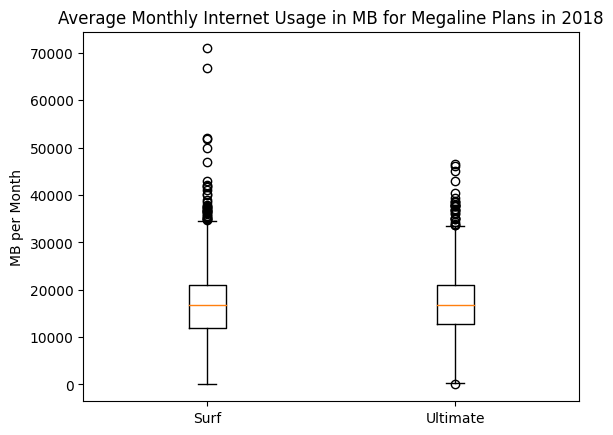

In [47]:
# Plot a boxplot to visualize the distribution of the monthly internet usage

plt.boxplot([surf_internet, ultimate_internet])
plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.ylabel('MB per Month')
plt.title('Average Monthly Internet Usage in MB for Megaline Plans in 2018')
plt.show()

In [48]:
# Test the difference in internet usage between plans with a t-test

print("Independent t-test comparing average monthly minutes for Surf and Ultimate plans:")
print(f"t-statistic: {st.ttest_ind(surf_internet, ultimate_internet, equal_var=False)[0]:.2f}")
print(f"p-value: {st.ttest_ind(surf_internet, ultimate_internet, equal_var=False)[1]:.4f}")

Independent t-test comparing average monthly minutes for Surf and Ultimate plans:
t-statistic: -1.85
p-value: 0.0651


The distributions of monthly internet usage (measured in MB) by Surf and Ultimate plans shared the same basic shape, which is slightly right-skewed. Frequencies were consistently higher for Surf plans than Ultimate plans across the distributions, especially for lower values. Overall, Surf plans were more frequent and slightly more right-skewed than Ultimate plans.

The mean of monthly internet usage was noticeably lower and the variance was somewhat higher for Surf plans (M = 16,558.28, Var = 64,175,571.68) than for Ultimate plans (M = 17,214.70, Var = 61,566,665.14). It looks like Surf plan users engage in less internat activity than Utimate plan users, but that is not quite supported by a non-significant t-test (t = -1.85, p = 0.07). 

## Revenue

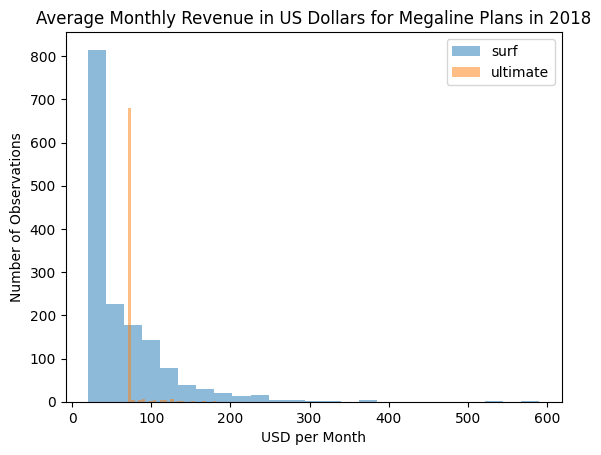

In [49]:
# Compare revenue derived from users of each plan per month

surf_revenue = df_monthly_merged[df_monthly_merged['plan'] == 'surf']['revenue']
ultimate_revenue = df_monthly_merged[df_monthly_merged['plan'] == 'ultimate']['revenue']

plt.hist(surf_revenue, bins=25, alpha=.5)
plt.hist(ultimate_revenue, bins=25, alpha=.5)
plt.xlabel('USD per Month')
plt.ylabel('Number of Observations')
plt.title('Average Monthly Revenue in US Dollars for Megaline Plans in 2018')
plt.legend(['surf','ultimate'])
plt.show()

In [50]:
# Follow-up to explore Ultimate plan monthly revenue values

display(ultimate_revenue.describe())
ultimate_revenue.value_counts()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: revenue, dtype: float64

70.0     679
91.0       6
126.0      6
112.0      5
77.0       5
84.0       4
119.0      4
105.0      4
182.0      2
98.0       1
140.0      1
168.0      1
154.0      1
133.0      1
Name: revenue, dtype: int64

In [51]:
# Calculate the mean and the variance of the monthly revenue

print(f"Mean of monthly revenue by Surf plan users: {np.mean(surf_revenue):.2f}")
print(f"Mean of monthly revenue by Ultimate plan users: {np.mean(ultimate_revenue):.2f}")
print()
print(f"Standard deviation of monthly revenue by Surf plan users: {np.std(surf_revenue):.2f}")
print(f"Standard deviation of monthly revenue by Ultimate plan users: {np.std(ultimate_revenue):.2f}")
print()
print(f"Variance of monthly revenue by Surf plan users: {np.var(surf_revenue):.2f}")
print(f"Variance of monthly revenue by Ultimate plan users: {np.var(ultimate_revenue):.2f}")

Mean of monthly revenue by Surf plan users: 60.71
Mean of monthly revenue by Ultimate plan users: 72.31

Standard deviation of monthly revenue by Surf plan users: 55.37
Standard deviation of monthly revenue by Ultimate plan users: 11.39

Variance of monthly revenue by Surf plan users: 3065.88
Variance of monthly revenue by Ultimate plan users: 129.67


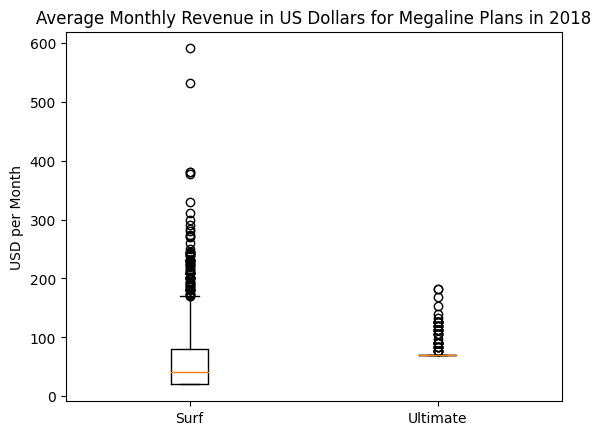

In [52]:
# Plot a boxplot to visualize the distribution of the monthly revenue

plt.boxplot([surf_revenue, ultimate_revenue])
plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.ylabel('USD per Month')
plt.title('Average Monthly Revenue in US Dollars for Megaline Plans in 2018')
plt.show()

In [53]:
# Test the difference in revenue between plans with a t-test

print("Independent t-test comparing average monthly revenue for Surf and Ultimate plans:")
print(f"t-statistic: {st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)[0]:.2f}")
print(f"p-value: {st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)[1]:.4f}")

Independent t-test comparing average monthly revenue for Surf and Ultimate plans:
t-statistic: -7.95
p-value: 0.0000


The distributions of monthly revenue from Surf and Ultimate plans were markedly different. Although both distributions were extremely right-skewed, the Ultimate plan distribution was concentrated almost entirely in a single value. More than 94% of all monthly revenue for Ultimate plans was $70, the basic minimum price. Apparently, Ultimate plan users almost always remain below their alotted minutes, messages, and internet activity. Overall, Surf plans were more frequent (except for one value), more varied, and less right-skewed than Ultimate plans.

The mean of monthly revenue was noticeably lower and the variance was very much higher for Surf plans (M = 60.71, Var = 3065.88) than for Ultimate plans (M = 72.31, Var = 129.67). It looks like Surf plan users generate less revenue than Ultimate plan users, as confirmed by a significant t-test (t = -7.95, p < 0.05).

## Test statistical hypotheses

In [54]:
# Test the hypotheses that the average revenue from users of the Ultimate and Surf calling plans differs

print("Independent t-test comparing average monthly revenue for Surf and Ultimate plans:")
print(f"t-statistic: {st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)[0]:.2f}")
print(f"p-value: {st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)[1]:.4f}")

Independent t-test comparing average monthly revenue for Surf and Ultimate plans:
t-statistic: -7.95
p-value: 0.0000


Null Hypothesis: The Surf and Ultimate plans generate equal average monthly revenue  
Alternative Hypothesis: The Surf and Ultimate plans generate different average monthly revenue  
Statistical Test: Independent t-test with alpha = 0.05 and equal variance not assumed  
Conclusion: We can reject the null hypothesis (t = -7.95, p < 0.05)

In [55]:
# Test the hypotheses that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

# Split revenue between the NY-NJ area and all other cities

df_merged_with_city = df_monthly_merged.merge(df_users[['user_id','city']], on='user_id', how='left')
df_merged_NJ_NY = df_merged_with_city[df_merged_with_city['city'].str.contains('NY-NJ-PA')]
df_merged_not_NJ_NY = df_merged_with_city[~df_merged_with_city['city'].str.contains('NY-NJ-PA')]

display(df_merged_NJ_NY.head())
df_merged_not_NJ_NY.head()

,user_id,month,calls,minutes,messages,mb,plan,revenue,city
56,1014,11,28,163,9,1175.59,surf,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
57,1014,12,150,1114,64,7792.41,surf,38.84,"New York-Newark-Jersey City, NY-NJ-PA MSA"
75,1022,5,39,302,0,4908.08,surf,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
76,1022,6,76,490,0,23436.48,surf,100.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
77,1022,7,70,475,0,9933.15,surf,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"


,user_id,month,calls,minutes,messages,mb,plan,revenue,city
0,1000,12,16,124,11,1901.47,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27,182,30,6919.15,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49,315,44,13314.82,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65,393,53,22330.49,surf,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64,426,36,18504.30,surf,60.00,"Seattle-Tacoma-Bellevue, WA MSA"


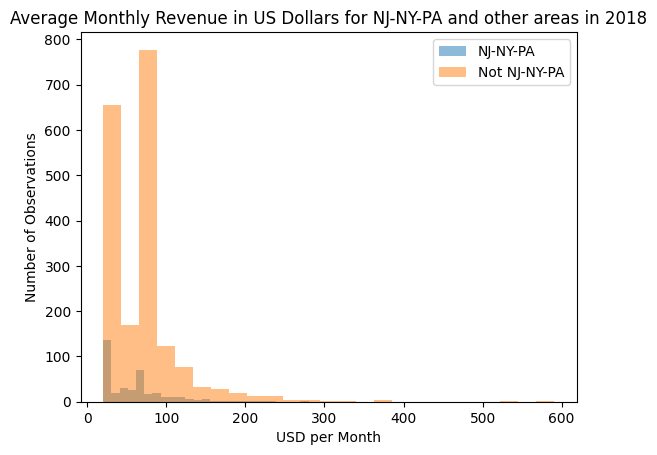

Mean of monthly revenue in NJ-NY-PA: 59.92
Mean of monthly revenue outside of NJ-NY-PA: 65.22

Standard deviation of monthly revenue in NJ-NY-PA: 43.48
Standard deviation of monthly revenue outside of NJ-NY-PA: 47.16

Variance of monthly revenue in NJ-NY-PA: 1890.52
Variance of monthly revenue outside of NJ-NY-PA: 2223.89

Number of users in NJ-NY-PA: 377
Number of users outside of NJ-NY-PA: 1916



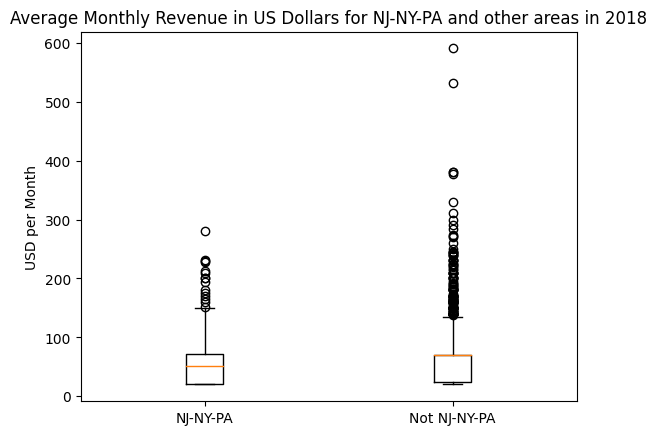

In [56]:
# Compare revenue by region

NJ_NY_revenue = df_merged_NJ_NY['revenue']
Not_NJ_NY_revenue = df_merged_not_NJ_NY['revenue']

plt.hist(NJ_NY_revenue, bins=25, alpha=.5)
plt.hist(Not_NJ_NY_revenue, bins=25, alpha=.5)
plt.xlabel('USD per Month')
plt.ylabel('Number of Observations')
plt.title('Average Monthly Revenue in US Dollars for NJ-NY-PA and other areas in 2018')
plt.legend(['NJ-NY-PA','Not NJ-NY-PA'])
plt.show()

print(f"Mean of monthly revenue in NJ-NY-PA: {np.mean(NJ_NY_revenue):.2f}")
print(f"Mean of monthly revenue outside of NJ-NY-PA: {np.mean(Not_NJ_NY_revenue):.2f}")
print()
print(f"Standard deviation of monthly revenue in NJ-NY-PA: {np.std(NJ_NY_revenue):.2f}")
print(f"Standard deviation of monthly revenue outside of NJ-NY-PA: {np.std(Not_NJ_NY_revenue):.2f}")
print()
print(f"Variance of monthly revenue in NJ-NY-PA: {np.var(NJ_NY_revenue):.2f}")
print(f"Variance of monthly revenue outside of NJ-NY-PA: {np.var(Not_NJ_NY_revenue):.2f}")
print()
print(f"Number of users in NJ-NY-PA: {len(NJ_NY_revenue)}")
print(f"Number of users outside of NJ-NY-PA: {len(Not_NJ_NY_revenue)}")
print()

plt.boxplot([NJ_NY_revenue, Not_NJ_NY_revenue])
plt.xticks([1, 2], ['NJ-NY-PA','Not NJ-NY-PA'])
plt.ylabel('USD per Month')
plt.title('Average Monthly Revenue in US Dollars for NJ-NY-PA and other areas in 2018')
plt.show()

In [57]:
# Test the hypotheses 

print("Independent t-test comparing average monthly revenue for NJ-NY-PA and other areas:")
print(f"t-statistic: {st.ttest_ind(NJ_NY_revenue, Not_NJ_NY_revenue, equal_var=False)[0]:.2f}")
print(f"p-value: {st.ttest_ind(NJ_NY_revenue, Not_NJ_NY_revenue, equal_var=False)[1]:.4f}")

Independent t-test comparing average monthly revenue for NJ-NY-PA and other areas:
t-statistic: -2.13
p-value: 0.0335


The distributions of monthly revenue from users in the NJ-NY-PA region and outside it shared the same basic shape, which is extremely right-skewed. Frequencies were consistently lower for the NJ-NY-PA region than for those outside it across the distributions. Overall, the users in the NJ-NY-PA region were less frequent and considerably less right-skewed than those outside it.

The mean and variance of monthly revenue were somewhat lower for users in the NJ-NY-PA region (M = 59.92, Var = 1890.52) than for those outside it (M = 65.22, Var = 2223.89), and there were more than five times as many users outside the NJ-NY-PA region (N = 1916) as within it (N = 377). It looks like users from the NJ-NY-PA region generate less revenue than users from other areas, as confirmed by a significant t-test (t = -2.13, p < 0.05).

Null Hypothesis: Users from the NJ-NY-PA region and those outside it generate equal average monthly revenue  
Alternative Hypothesis: Users from the NJ-NY-PA region and those outside it generate different average monthly revenue  
Statistical Test: Independent t-test with alpha = 0.05 and equal variance not assumed  
Conclusion: We can reject the null hypothesis (t = -2.13, p < 0.05)

In [58]:
# Since this analysis is all about comparing the plans, I will do that within the NJ-NY-PA region and outside it

# Compare revenue by region and plan

surf_revenue_NJ_NY = df_merged_NJ_NY[df_merged_NJ_NY['plan'] == 'surf']['revenue']
surf_revenue_not_NJ_NY = df_merged_not_NJ_NY[df_merged_not_NJ_NY['plan'] == 'surf']['revenue']
ultimate_revenue_NJ_NY = df_merged_NJ_NY[df_merged_NJ_NY['plan'] == 'ultimate']['revenue']
ultimate_revenue_not_NJ_NY = df_merged_not_NJ_NY[df_merged_not_NJ_NY['plan'] == 'ultimate']['revenue']

print(f"Mean of monthly revenue by Surf plan users in NJ-NY-PA: {np.mean(surf_revenue_NJ_NY):.2f}")
print(f"Mean of monthly revenue by Surf plan users outside of NJ-NY-PA: {np.mean(surf_revenue_not_NJ_NY):.2f}")
print(f"Mean of monthly revenue by Ultimate plan users in NJ-NY-PA: {np.mean(ultimate_revenue_NJ_NY):.2f}")
print(f"Mean of monthly revenue by Ultimate plan users outside of NJ-NY-PA: {np.mean(ultimate_revenue_not_NJ_NY):.2f}")
print()
print(f"Variance of monthly revenue by Surf plan users in NJ-NY-PA: {np.var(surf_revenue_NJ_NY):.2f}")
print(f"Variance of monthly revenue by Surf plan users outside of NJ-NY-PA: {np.var(surf_revenue_not_NJ_NY):.2f}")
print(f"Variance of monthly revenue by Ultimate plan users in NJ-NY-PA: {np.var(ultimate_revenue_NJ_NY):.2f}")
print(f"Variance of monthly revenue by Ultimate plan users outside of NJ-NY-PA: {np.var(ultimate_revenue_not_NJ_NY):.2f}")
print()
print(f"Number of Surf plan users in NJ-NY-PA: {len(surf_revenue_NJ_NY)}")
print(f"Number of Surf plan users outside of NJ-NY-PA: {len(surf_revenue_not_NJ_NY)}")
print(f"Number of Ultimate plan users in NJ-NY-PA: {len(ultimate_revenue_NJ_NY)}")
print(f"Number of Ultimate plan users outside of NJ-NY-PA: {len(ultimate_revenue_not_NJ_NY)}")
print()

revenue_means = pd.DataFrame({
    'Region': ['NJ-NY-PA', 'Not NJ-NY-PA'],
    'Surf': [np.mean(surf_revenue_NJ_NY), np.mean(surf_revenue_not_NJ_NY)],
    'Ultimate': [np.mean(ultimate_revenue_NJ_NY), np.mean(ultimate_revenue_not_NJ_NY)]
})

print("Mean Average Monthly Revenue:")
display(round(revenue_means, 2))

Mean of monthly revenue by Surf plan users in NJ-NY-PA: 56.79
Mean of monthly revenue by Surf plan users outside of NJ-NY-PA: 61.68
Mean of monthly revenue by Ultimate plan users in NJ-NY-PA: 74.95
Mean of monthly revenue by Ultimate plan users outside of NJ-NY-PA: 72.05

Variance of monthly revenue by Surf plan users in NJ-NY-PA: 2185.49
Variance of monthly revenue by Surf plan users outside of NJ-NY-PA: 3278.98
Variance of monthly revenue by Ultimate plan users in NJ-NY-PA: 201.61
Variance of monthly revenue by Ultimate plan users outside of NJ-NY-PA: 121.77

Number of Surf plan users in NJ-NY-PA: 312
Number of Surf plan users outside of NJ-NY-PA: 1261
Number of Ultimate plan users in NJ-NY-PA: 65
Number of Ultimate plan users outside of NJ-NY-PA: 655

Mean Average Monthly Revenue:


,Region,Surf,Ultimate
0,NJ-NY-PA,56.79,74.95
1,Not NJ-NY-PA,61.68,72.05


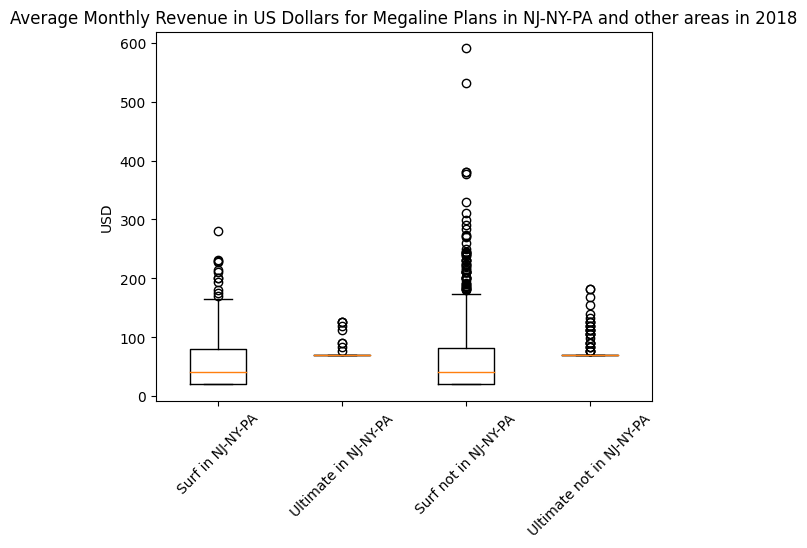

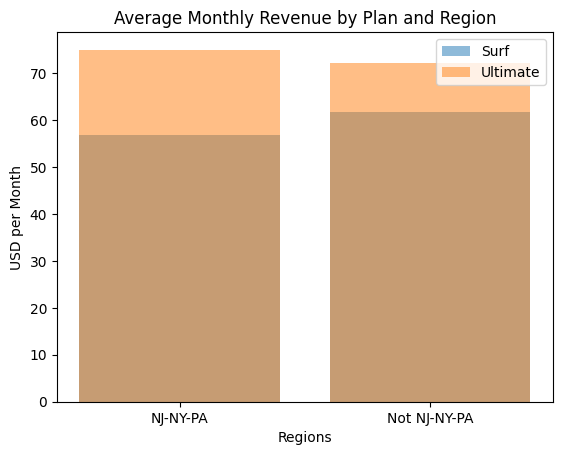

In [59]:
# Plot revenue by region and plan

plt.boxplot([surf_revenue_NJ_NY, ultimate_revenue_NJ_NY, surf_revenue_not_NJ_NY, ultimate_revenue_not_NJ_NY])
plt.xticks([1, 2, 3, 4], ['Surf in NJ-NY-PA','Ultimate in NJ-NY-PA','Surf not in NJ-NY-PA','Ultimate not in NJ-NY-PA'], rotation=45)
plt.ylabel('USD')
plt.title('Average Monthly Revenue in US Dollars for Megaline Plans in NJ-NY-PA and other areas in 2018')
plt.show()

x_axis_list = ['NJ-NY-PA','Not NJ-NY-PA']
y_axis_list1 =  [np.mean(surf_revenue_NJ_NY), np.mean(surf_revenue_not_NJ_NY)]
y_axis_list2 =  [np.mean(ultimate_revenue_NJ_NY), np.mean(ultimate_revenue_not_NJ_NY)]
plt.bar(x_axis_list, y_axis_list1, alpha=.5)
plt.bar(x_axis_list, y_axis_list2, alpha=.5)
plt.xlabel('Regions')
plt.ylabel('USD per Month')
plt.title('Average Monthly Revenue by Plan and Region')
plt.legend(['Surf', 'Ultimate'], loc='upper right')
plt.show()

In [60]:
# Test the hypotheses 

print("Independent t-test comparing average monthly revenue for Surf plans and Ultmate plans in the NJ-NY-PA region:")
print(f"t-statistic: {st.ttest_ind(surf_revenue_NJ_NY, ultimate_revenue_NJ_NY, equal_var=False)[0]:.2f}")
print(f"p-value: {st.ttest_ind(surf_revenue_NJ_NY, ultimate_revenue_NJ_NY, equal_var=False)[1]:.4f}")
print()
print("Independent t-test comparing average monthly revenue for Surf plans and Ultmate plans outside the NJ-NY-PA region:")
print(f"t-statistic: {st.ttest_ind(surf_revenue_not_NJ_NY, ultimate_revenue_not_NJ_NY, equal_var=False)[0]:.2f}")
print(f"p-value: {st.ttest_ind(surf_revenue_not_NJ_NY, ultimate_revenue_not_NJ_NY, equal_var=False)[1]:.4f}")

Independent t-test comparing average monthly revenue for Surf plans and Ultmate plans in the NJ-NY-PA region:
t-statistic: -5.69
p-value: 0.0000

Independent t-test comparing average monthly revenue for Surf plans and Ultmate plans outside the NJ-NY-PA region:
t-statistic: -6.21
p-value: 0.0000


Surf plans generate more average monthly revenue than Ultimate plans both in the NJ-NY-PA region and outside it, but the difference is noticeably larger in the NJ-NY-PA region. Given the especially large disparity in revenue from Surf plans relative to Ultimate plans in the NJ-NY-PA region, it might make sense to advertise Surf plans more aggressively there than elsewhere. 

## General conclusion

The biggest assumption I made was assuming the data in the dataset was a representative sample of the population of Megaline users. It contained data on 137,735 calls, 76,051 messages, and 104,825 internet sessions but only from 500 users across 2,293 user-months, which is a relatively small sample. Some users neglected to make calls, send messages, or use the internet on some months, which is perfectly normal. Ten users showed no activity in any month and were thus excluded from the analysis. I was also assuming data from 2018 was relevant for user behavior in the future, that nothing about the plans or users has changed significantly in the interim. My decisions to assume variance was equal or not for the t-tests was based on my subjective judgment of variance differences without running any formal tests to check their validity. In the end, those decisions did not affect the general conclusions. Finally, I assumed the questions asked about monthly call duration and the NY-NJ region were pertinent to the task without exploring time or region beyond them. 

There were no significant differences in behavior between plans regarding average monthly minutes and internet usage, but Surf plan users sent fewer messages and generated less revenue than Ultimate plan users. Messaging behavior aside, I think revenue difference derive mostly from plan pricing. The base monthly price for Ultimate plans is so much higher than that for Surf plans (\\$70 vs \\$20) that it makes up for the fact that extremely few Ultimate plan users exceed their allotted minutes, messages, and internet usage. Advertising should push the Ultimate plan when possible to maximize revenue, perhaps emphasizing that most Ultimate plan users never have to pay more than the base price. Increasing the base price of Surf plans or decreasing the allotted usage for Ultimate plans might also be worth considering to increase revenue. 

Phone call duration was very low for Surf plan users during January and spiked during February, so it might make sense to advertise them more heavily in January to increase call duration and lock in as many users as possible for the peak in February. Call duration was low for Ultimate plan users before April, so it might make sense for the same reasons to advertise those plans more heavily early in the year, particularly in March (when call duration was lowest). 

The NJ-NY-PA region was significantly less lucrative than other areas but the difference was fairly small. It might be worth increassing advertising in that area, especially for Ultimate plans because their revenue advantage over Surf plans was particularly pronounced there. 

In conclusion, when it comes to revenue, the Ultimate plan is generally better for business. 